In [79]:
from divegame import diveGame, zeroBoard
import pickle
from fatal_flaw import fatalFlaw, getActions
import pdb
from softmaxExplain import findStates2
from datetime import datetime
import random
import pandas
from experiment import reconstructStates
import numpy as np
import math
from categorize import categorize
from matplotlib import pyplot as plt

In [83]:
f = open("Test State Q values", 'rb')
highestPossible = 310
qvalues = pickle.load(f)
datas = []
vvalues = {}
for state, action in qvalues:
    if state not in vvalues:
        vvalues[state] = qvalues[(state, action)]
    else:
        vvalues[state] = max(qvalues[(state, action)], vvalues[state])

def process(name, expgroup):
    f = open("playdata/" + name, "rb")
    f2 = open("playdata/" + name + "2", "rb")
    data = pickle.load(f)
    mistakeIndex = data['FatalFlawData'][6]
    mistakeState = data['playthrough'][1][0][mistakeIndex]
    mistakeAction = data['playthrough'][1][1][mistakeIndex]
    
    
    d = {}
    
    d['initial score'] = data['playthrough'][-1][0][-1].cash
    initialFraction = d['initial score'] / highestPossible
    data2 = pickle.load(f2)
    d['initialFraction'] = initialFraction
    d['name'] = name
    d['experiment group'] = expgroup
    d['mistake type'] = data['FatalFlawData'][-1]
    d['group'] = data['group']
    testStates = reconstructStates(pickle.load(open("group" + str(data['group'])+ "States", "rb")))
    total = 0
    gA = 0
    for i in range(len(testStates)):
        for j in range(len(testStates)):
            if testStates[i] == data['testStates'][j][0]:
                d[i + 1] = qvalues[(data['testStates'][j][0], data['testStates'][j][1])] \
                         / vvalues[data['testStates'][j][0]]
                if name == "raymond":
                    d[5] = 1
                #total += d[i + 1]
    testStates = reconstructStates(pickle.load(open("General Test States", "rb")))
    for i in range(6, 12):
        for j in range(6):
            if testStates[i - 6] == data2['testStates'][j][0]:
                d[i + 1] = qvalues[(data2['testStates'][j][0], data2['testStates'][j][1])] \
                          / vvalues[data2['testStates'][j][0]]
                total += d[i + 1]
                gA += d[i + 1] / 6
                    
    time = 0
    for i in data['testStatesTimes']:
        time += i.total_seconds()
    
    for i in data2['testStatesTimes']:
        time += i.total_seconds()
    d['time'] = time
    d['total'] = total
    d['generalAverage'] = gA
    datas.append(d)

    
    

process("calvin", "short explanation")
process("raymond", "short explanation")
#process("kenneth", "short explanation")
process("sam", "short explanation")
process("stanley", "short explanation")
process("arvin", "short explanation")
process("hong", "short explanation")



process("aayush", "long explanation")
process("karthik", "long explanation")
process("nadir", "long explanation")
#process("rustie", "long explanation")
process("andy", "long explanation")
process("gokul", "long explanation")


process("jonny", "no explanation")
process("alex", "no explanation")
process("ket", "no explanation")
process("charlie", "no explanation")
process("aakash", "no explanation")
process("neel", "no explanation")
process("kartik", "no explanation")
process("sera", "no explanation")
process("jinsu", "no explanation")


df = pandas.DataFrame(datas)    
df

,experiment group,group,initial score,initialFraction,mistake type,name,1,2,3,4,...,6,7,8,9,10,11,12,time,total,generalAverage
0,short explanation,1,0,0.000000,CorrectionType.J,calvin,1.000000,1.000000,1.000000,1.000000,...,0.958005,1.000000,1.000000,1.000000,1.000000,0.847291,1.000000,1152.609880,5.847291,0.974548
1,short explanation,1,258,0.832258,CorrectionType.J,raymond,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.685649,1.000000,1.000000,1.000000,0.847291,1.000000,1246.503988,5.532940,0.922157
2,short explanation,1,97,0.312903,CorrectionType.B,sam,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.685649,1.000000,1.000000,1.000000,0.640394,0.937644,422.562166,5.263688,0.877281
3,short explanation,3,88,0.283871,CorrectionType.I,stanley,0.870423,0.866953,0.775244,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,952.744304,6.000000,1.000000
4,short explanation,2,222,0.716129,CorrectionType.E,arvin,1.000000,1.000000,1.000000,1.000000,...,0.922330,1.000000,0.654545,1.000000,0.845758,0.640394,0.937644,1064.921354,5.078342,0.846390
5,short explanation,1,0,0.000000,CorrectionType.A,hong,1.000000,1.000000,0.653226,0.490909,...,0.986877,0.685649,1.000000,1.000000,1.000000,0.640394,0.937644,1131.997097,5.263688,0.877281
6,long explanation,1,0,0.000000,CorrectionType.A,aayush,1.000000,0.760331,1.000000,0.449587,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.640394,1.000000,714.216283,5.640394,0.940066
7,long explanation,2,222,0.716129,CorrectionType.E,karthik,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.654545,1.000000,1.000000,0.847291,1.000000,834.866571,4.501836,0.750306
8,long explanation,2,222,0.716129,CorrectionType.E,nadir,1.000000,0.898305,1.000000,0.535897,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.847291,1.000000,561.681458,5.847291,0.974548
9,long explanation,1,0,0.000000,CorrectionType.J,andy,1.000000,1.000000,0.653226,0.490909,...,1.000000,0.685649,0.542424,0.865429,1.000000,0.847291,0.789838,566.611813,4.730632,0.788439


Text(0.5, 1.0, 'Explanation vs No Explanation avg on 7-12 (General States)')

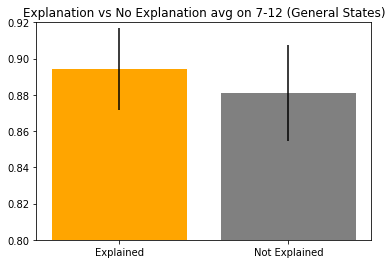

In [84]:
df2 = df[(df['experiment group'] == "long explanation") | (df['experiment group'] == "short explanation")]
df3 = df[(df['experiment group'] == "no explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0.8, 0.92)
plt.title("Explanation vs No Explanation avg on 7-12 (General States)")

Text(0.5, 1.0, 'Explanation vs No Explanation, Group 1, avg on 7-12 (General States)')

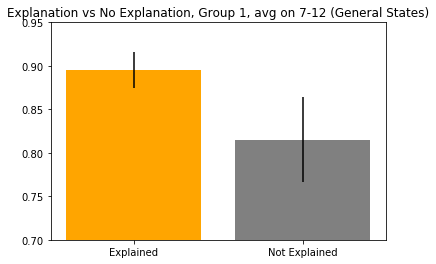

In [100]:
df2 = df[(df['group'] == 1) & ((df['experiment group'] == "long explanation") | (df['experiment group'] == "short explanation"))]
df3 = df[(df['group'] == 1) & (df['experiment group'] == "no explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0.7, 0.95)
plt.title("Explanation vs No Explanation, Group 1, avg on 7-12 (General States)")

Text(0.5, 1.0, 'Explanation vs No Explanation, Group2, on 7-12 (General States)')

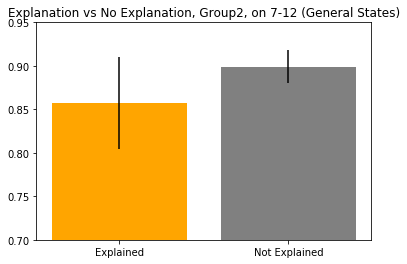

In [101]:
df2 = df[(df['group'] == 2) & ((df['experiment group'] == "long explanation") | (df['experiment group'] == "short explanation"))]
df3 = df[(df['group'] == 2) & (df['experiment group'] == "no explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0.7, 0.95)
plt.title("Explanation vs No Explanation, Group2, on 7-12 (General States)")

Text(0.5, 1.0, 'Explanation vs No Explanation, Group 1, on 1-6, 7, 8')

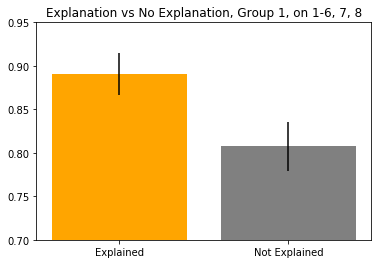

In [131]:
df1 = df[(df['group'] == 1) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['group'] == 1) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0.7, 0.95)
plt.title("Explanation vs No Explanation, Group 1, on 1-6, 7, 8")

Text(0.5, 1.0, 'Explanation vs No Explanation, Group 2, on 1-6, 9, 10')

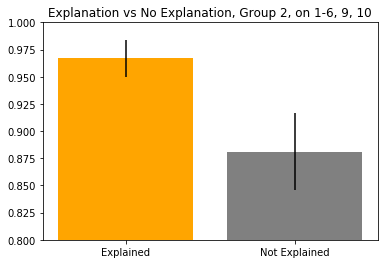

In [86]:
df1 = df[(df['group'] == 2) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['group'] == 2) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0.8, 1)
plt.title("Explanation vs No Explanation, Group 2, on 1-6, 9, 10")

Text(0.5, 1.0, 'Explanation vs No Explanation, Mistake type E (group 2 tank type), score on 1-6, 9, 10')

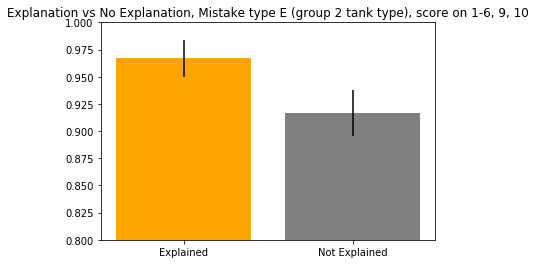

In [111]:
df1 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0.8, 1)
plt.title("Explanation vs No Explanation, Mistake type E (group 2 tank type), score on 1-6, 9, 10")

Text(0.5, 1.0, 'Explanation vs No Explanation, Mistake type E (group 2 tank type), #Mistakes of type E on 1-6, 9, 10')

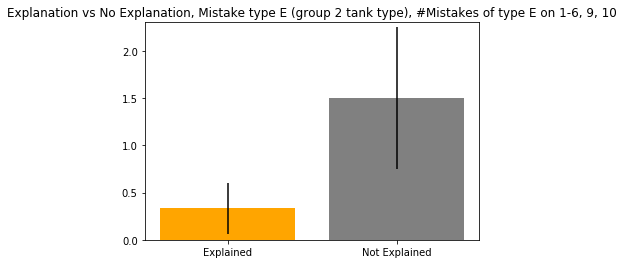

In [117]:
df1 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df2 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]

avg1 = np.mean([1, 0, 0])
avg2 = np.mean([2, 1, 1, 2])
stderr1 = np.std([1, 0, 0]) /  np.sqrt(3)
stderr2 = np.mean([2, 1, 1, 2]) / np.sqrt(4)

plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0, 2.3)
plt.title("Explanation vs No Explanation, Mistake type E (group 2 tank type), #Mistakes of type E on 1-6, 9, 10")

Text(0.5, 1.0, 'Explanation vs No Explanation, Mistake type E (group 2 tank type), #Mistakes of group 2 on 1-6, 9, 10')

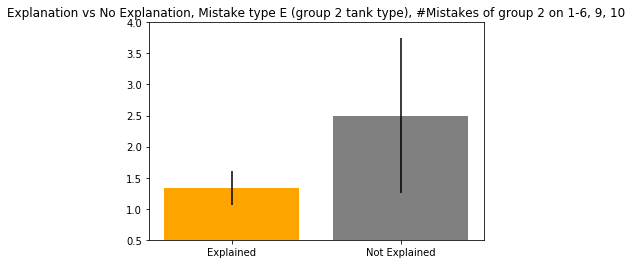

In [116]:
df1 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df2 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]

avg1 = np.mean([2, 1, 1])
avg2 = np.mean([3, 1, 3, 3])
stderr1 = np.std([2, 1, 1]) /  np.sqrt(3)
stderr2 = np.mean([3, 1, 3, 3]) / np.sqrt(4)

plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0.5, 4)
plt.title("Explanation vs No Explanation, Mistake type E (group 2 tank type), #Mistakes of group 2 on 1-6, 9, 10")

Text(0.5, 1.0, 'Explanation vs No Explanation, Mistake type A (group 1 surface type), on 1-6, 9, 10')

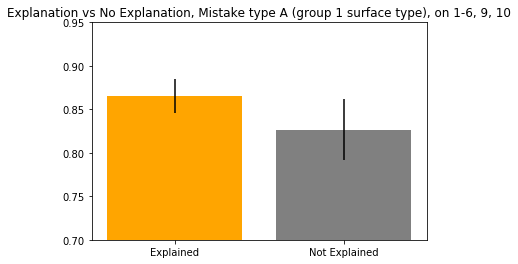

In [93]:
df1 = df[(df['mistake type'] == CorrectionType.A) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['mistake type'] == CorrectionType.A) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0.7, 0.95)
plt.title("Explanation vs No Explanation, Mistake type A (group 1 surface type), on 1-6, 9, 10")

Text(0.5, 1.0, 'Explanation vs No Explanation, Mistake type A (group 2 surface type), #Mistakes of type A on 1-6, 9, 10')

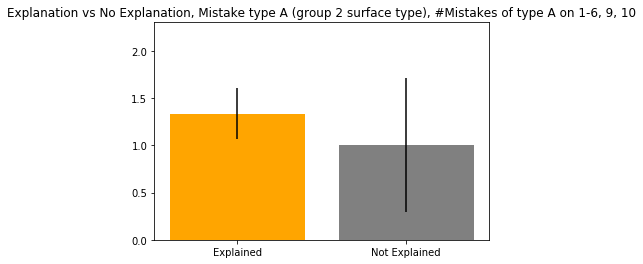

In [118]:
df1 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df2 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]

avg1 = np.mean([2, 1, 1])
avg2 = np.mean([1, 1])
stderr1 = np.std([2, 1, 1]) /  np.sqrt(3)
stderr2 = np.mean([1, 1]) / np.sqrt(2)

plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0, 2.3)
plt.title("Explanation vs No Explanation, Mistake type A (group 2 surface type), #Mistakes of type A on 1-6, 9, 10")

Text(0.5, 1.0, 'Explanation vs No Explanation, Mistake type A (group 2 surface type), #Mistakes of type A on 1-6, 9, 10')

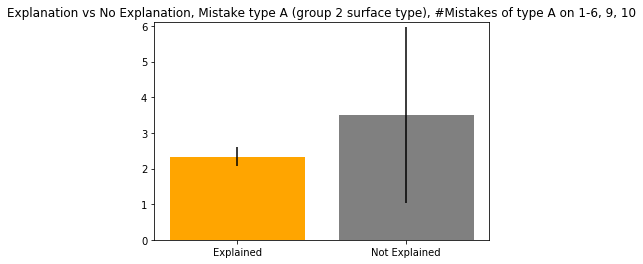

In [124]:
df1 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] != "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df2 = df[(df['mistake type'] == CorrectionType.E) & (df['experiment group'] == "no explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]

avg1 = np.mean([3, 2, 2])
avg2 = np.mean([4, 3])
stderr1 = np.std([3, 2, 2]) /  np.sqrt(3)
stderr2 = np.mean([4, 3]) / np.sqrt(2)

plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Explained", "Not Explained"])
plt.ylim(0, 6.1)
plt.title("Explanation vs No Explanation, Mistake type A (group 2 surface type), #Mistakes of type A on 1-6, 9, 10")

Text(0.5, 1.0, 'Long vs Short avg on 7-12 (General States)')

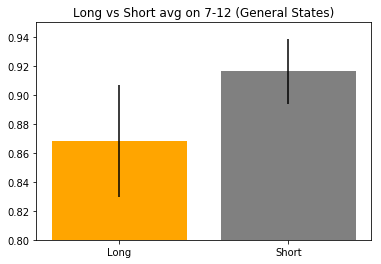

In [127]:
df2 = df[(df['experiment group'] == "long explanation")]
df3 = df[(df['experiment group'] == "short explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Long", "Short"])
plt.ylim(0.8, 0.95)
plt.title("Long vs Short avg on 7-12 (General States)")

Text(0.5, 1.0, 'Long vs Short, Group 1, avg on 7-12 (General States)')

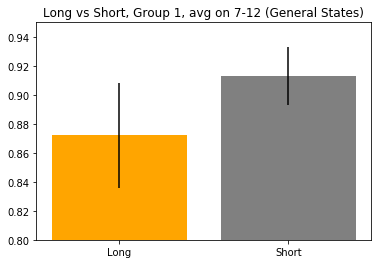

In [130]:
df2 = df[(df['group'] == 1) & ((df['experiment group'] == "long explanation"))]
df3 = df[(df['group'] == 1) & (df['experiment group'] == "short explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Long", "Short"])
plt.ylim(0.8, 0.95)
plt.title("Long vs Short, Group 1, avg on 7-12 (General States)")

Text(0.5, 1.0, 'Long vs Short, Group2, on 7-12 (General States)')

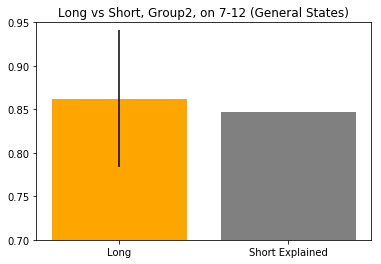

In [132]:
df2 = df[(df['group'] == 2) & ((df['experiment group'] == "long explanation"))]
df3 = df[(df['group'] == 2) & (df['experiment group'] == "short explanation")]
avg1 = np.mean(df2['generalAverage'])
avg2 = np.mean(df3['generalAverage'])
stderr1 = np.std(df2['generalAverage']) / math.sqrt(len(df2))
stderr2 = np.std(df3['generalAverage']) / math.sqrt(len(df3))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Long", "Short Explained"])
plt.ylim(0.7, 0.95)
plt.title("Long vs Short, Group2, on 7-12 (General States)")

Text(0.5, 1.0, 'Long vs Short, Group 1, on 1-6, 7, 8')

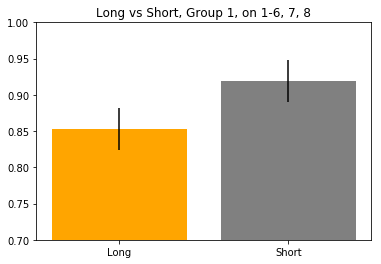

In [134]:
df1 = df[(df['group'] == 1) & (df['experiment group'] == "long explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['group'] == 1) & (df['experiment group'] == "short explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 7, 8]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Long", "Short"])
plt.ylim(0.7, 1)
plt.title("Long vs Short, Group 1, on 1-6, 7, 8")

Text(0.5, 1.0, 'Explanation vs No Explanation, Group 2, on 1-6, 9, 10')

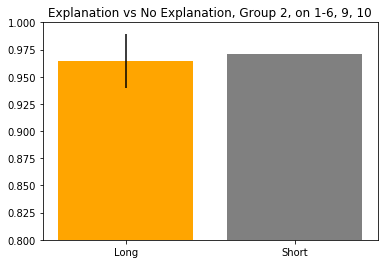

In [135]:
df1 = df[(df['group'] == 2) & (df['experiment group'] == "long explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df1['sum'] = df1.iloc[:, 3:].sum(axis = 1) / 8
df2 = df[(df['group'] == 2) & (df['experiment group'] == "short explanation")][['name', 'experiment group', 'initial score', 1, 2, 3, 4, 5, 6, 9, 10]]
df2['sum'] = df2.iloc[:, 3:].sum(axis = 1) / 8

avg1 = np.mean(df1['sum'])
avg2 = np.mean(df2['sum'])

stderr1 = np.std(df1['sum']) / math.sqrt(len(df1))
stderr2 = np.std(df2['sum']) / math.sqrt(len(df2))
plt.bar(x=[0, 1], height=[avg1, avg2], yerr = [stderr1, stderr2], color = ['orange', 'grey'], tick_label = ["Long", "Short"])
plt.ylim(0.8, 1)
plt.title("Explanation vs No Explanation, Group 2, on 1-6, 9, 10")